In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

In [10]:
def combine_files(paths, output_path=None):
    df = pd.DataFrame()
    for path in paths:
        df_i = pd.read_csv(path,index_col=None)
        df = pd.concat([df, df_i], axis=0)
    if output_path is not None:
        df.to_csv(output_path,index=False)
    return df

In [16]:
def plotting(oper_char_df, x_axis='p', hue='method', plot_size=False):
    #sns.histplot(oper_char_df["sparsity size"])
    #plt.show()
    if plot_size:
        fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=1, ncols=7, figsize=(12,8))
    else:
        fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=6, figsize=(12,8))

    print("Mean coverage rate/length:")
    print(oper_char_df.groupby([x_axis, hue]).mean())

    cov_plot = sns.boxplot(y=oper_char_df["coverage rate"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           palette="pastel",
                           orient="v", ax=ax1,
                           showmeans=True,
                           linewidth=1)
    cov_plot.set(title='Coverage')
    cov_plot.set_ylim(0., 1.05)
    #plt.tight_layout()
    cov_plot.axhline(y=0.9, color='k', linestyle='--', linewidth=1)
    #ax1.set_ylabel("")  # remove y label, but keep ticks

    len_plot = sns.boxplot(y=oper_char_df["avg length"],
                           x=oper_char_df[x_axis],
                           hue=oper_char_df[hue],
                           palette="pastel",
                           orient="v", ax=ax2,
                           linewidth=1)
    len_plot.set(title='Length')
    # len_plot.set_ylim(0, 100)
    # len_plot.set_ylim(3.5, 7.8)
    # plt.tight_layout()
    # ax2.set_ylabel("")  # remove y label, but keep ticks

    handles, labels = ax2.get_legend_handles_labels()
    # fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.2)
    fig.subplots_adjust(bottom=0.2)
    fig.legend(handles, labels, loc='lower center', ncol=4)

    """F1_plot = sns.boxplot(y=oper_char_df["F1 score"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax3,
                          linewidth=1)
    F1_plot.set(title='F1 score')
    
    F1pi_plot = sns.boxplot(y=oper_char_df["F1 score (post inf)"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax4,
                          linewidth=1)
    F1pi_plot.set(title='F1 score (post inf)')"""
    
    
    power_plot = sns.boxplot(y=oper_char_df["Selection power"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax3,
                          linewidth=1)
    power_plot.set(title='Selection power')
    
    cond_power_plot = sns.boxplot(y=oper_char_df["Cond. power"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax4,
                          linewidth=1)
    cond_power_plot.set(title='Conditional power')
    
    power_pi_plot = sns.boxplot(y=oper_char_df["Power post inf"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax5,
                          linewidth=1)
    power_pi_plot.set(title='Power post inf')
    
    FDP_plot = sns.boxplot(y=oper_char_df["FDP"],
                          x=oper_char_df[x_axis],
                          hue=oper_char_df[hue],
                          palette="pastel",
                          orient="v", ax=ax6,
                          linewidth=1)
    FDP_plot.set(title='FDP')
    
    if plot_size:
        size_plot = sns.boxplot(y=oper_char_df["E size"],
                              x=oper_char_df[x_axis],
                              hue=oper_char_df[hue],
                              palette="pastel",
                              orient="v", ax=ax7,
                              linewidth=1)
        size_plot.set(title='|E|')

    cov_plot.legend_.remove()
    len_plot.legend_.remove()
    power_plot.legend_.remove()
    cond_power_plot.legend_.remove()
    power_pi_plot.legend_.remove()
    if plot_size:
        size_plot.legend_.remove()

    #plt.suptitle("Changing n,p")
    plt.subplots_adjust(wspace=0.6, hspace=0.5)
    plt.show()

In [20]:
paths_result = ["GGM_vary_signal_logic0_0_10.csv"]
oper_char = combine_files(paths_result)
oper_char = oper_char.drop(["n,p"], axis=1)

Mean coverage rate/length:
                       coverage rate  avg length  F1 score   
signal method                                                
0.4    Approx               0.859048    0.233044  0.064780  \
       Data Splitting       0.850000    0.246579  0.011516   
0.5    Approx               0.960000    0.233167  0.047384   
       Data Splitting       0.900000    0.248788  0.014422   
0.6    Approx               0.919689    0.239716  0.083919   
       Data Splitting       0.716667    0.253057  0.014856   
0.7    Approx               0.943651    0.243101  0.084279   
       Data Splitting       0.900000    0.254784  0.013354   
0.8    Approx               0.925988    0.242689  0.103881   
       Data Splitting       1.000000    0.267587  0.019925   

                       F1 score (post inf)  E size  Selection power   
signal method                                                         
0.4    Approx                     0.008201    11.8         0.033790  \
       Data Spl

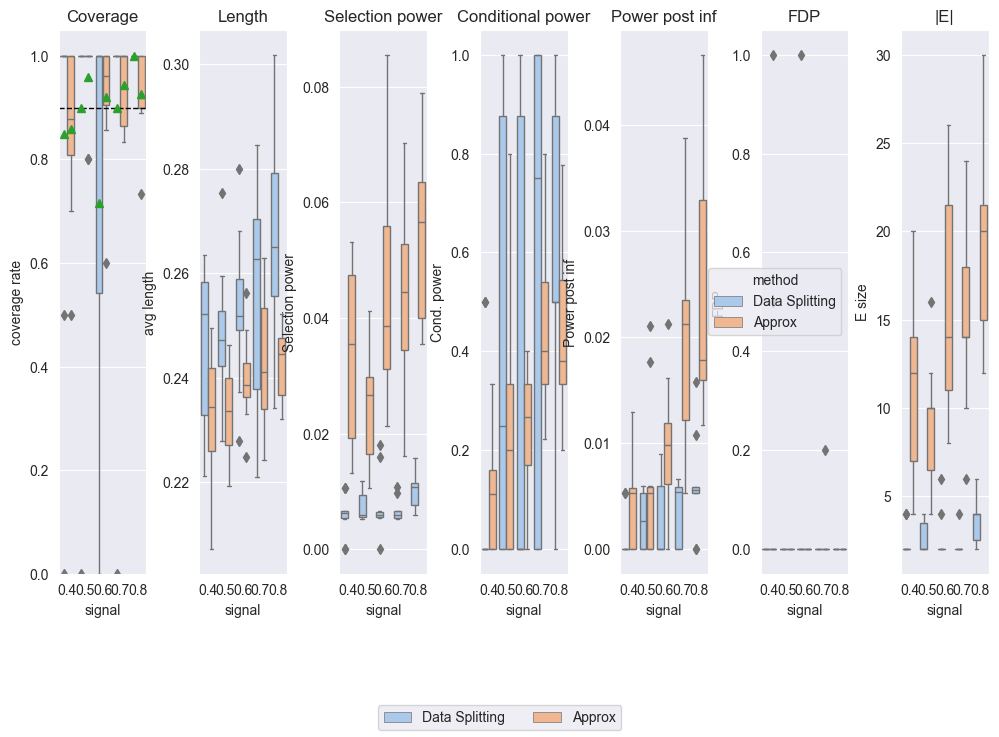

In [21]:
plotting(oper_char, x_axis="signal", hue="method", plot_size=True)